## Introduction to Python: Pandas

In this notebook we study one of the main packages of Python - Pandas. Pandas is a powerful package for data analysis and manipulation allowing to load date to table format and do faster computations over them.

## Introduction to Pandas

Before we start import necessary packages

In [47]:
import pandas as pd

Pandas introduces two new data structures to Python - Series and DataFrame, both of which are built on top of NumPy (this means it's fast).

#### DataFrame
A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

For the rest of the tutorial, we'll be primarily working with DataFrames.

#### Series
A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

Using pandas **we will explore the dataset with Point Of Interest from OSM download we got from overpass-turbo.eu**. OSM is the biggest source of open geographical data for the whole world. For our analysis we will consider already prepared subset of our data download. When we jump into GeoPandas today, you will prepare the file we work with here on your own.

### Jupyter Notebook shortcuts

Before we start, let's learn very useful shortcuts for Jupyter Notebook:

Press 'A' (on the left of the cell near 'In') = add cell above

Press 'B' (on the left of the cell near 'In') = add cell below

Press 'M' (on the left of the cell near 'In') = change a cell into text format

Press 'DD' to delete cell

#### Begin with reading the OSM point of interest (amenities) data.

Reading a CSV is as simple as calling the read_csv function. By default, the read_csv function expects the column separator to be a comma, but you can change that using the sep parameter.

In [130]:
osm_poi = pd.read_csv('osm_poi_points_moscow.csv')

In [70]:
osm_poi = pd.read_csv('osm_poi_points_moscow.csv', sep=',')

The shape function above shows (number of rows, number of columns):

In [71]:
osm_poi.shape

(9298, 10)

We can print only first 5 rows of DataFrame using function head():

In [72]:
osm_poi.head()

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon
0,node/253721996,clock,NaN,NaN,NaN,NaN,NaN,NaN,55.729981,37.639591
1,node/255742562,pub,Кружка,NaN,NaN,NaN,NaN,NaN,55.759269,37.580098
2,node/255742645,pub,Кружка,Kruzhka,NaN,NaN,NaN,"Mo-Su 12:00-24:00; Fr,Sa 12:00-04:00",55.765586,37.638983
3,node/267336195,fast_food,Му-Му,NaN,NaN,NaN,NaN,Mo-Su 09:00-23:00,55.760800,37.632065
4,node/272607919,fuel,Татнефть,Tatneft,NaN,NaN,NaN,NaN,55.750820,37.658309


Or the last 5 rows:

In [73]:
osm_poi.tail()

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon
9293,node/6276770736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763714,37.636540
9294,node/6279516064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763922,37.637035
9295,node/6271936692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763463,37.637633
9296,node/6275142726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.764186,37.637372
9297,node/6334946380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.754475,37.655104


Print all DataFrame columns

In [74]:
osm_poi.columns

Index(['id', 'amenity', 'name', 'name:en', 'level', 'addr:housenumber',
       'addr:street', 'opening_hours', 'lat', 'lon'],
      dtype='object')

If there's too much columns, to see all of them, we have to make a list out of all columns. For that, we wrap the line above into list() like so:

In [75]:
list(osm_poi.columns)

['id',
 'amenity',
 'name',
 'name:en',
 'level',
 'addr:housenumber',
 'addr:street',
 'opening_hours',
 'lat',
 'lon']




**Let's describe what each column means:**


**id** - OpenStreetMap id for an object

**amenity** - type of amenity (point of interest) - like food, pub, etc

**name** - original place/POI name (mostly in Russian for Moscow)

**name:en** - place/POI name in English (if available)

**building:levels** - level of the building on which this place/POI is located

**addr:housenumber** - well, house number from the address

**addr:street** - street name from the address

**opening_hours** - opening hours of the POI if available

**lat** - geo based Lattitude of the POI location

**lon** - geo based Longitude of the POI location

Print columns types:

In [55]:
osm_poi.dtypes

id                   object
amenity              object
name                 object
name:en              object
building:levels     float64
addr:housenumber     object
addr:street          object
opening_hours        object
lat                 float64
lon                 float64
dtype: object

To print the statistics over DataFrame. Only works for numerical columns, in our case float64 data type from the line above.

In [76]:
osm_poi.describe()

,lat,lon
count,9298.000000,9298.000000
mean,55.754600,37.618688
std,0.012976,0.023193
min,55.728609,37.576519
25%,55.743508,37.598527
50%,55.757354,37.619230
75%,55.765197,37.636909
max,55.774781,37.661867


### Let's learn the various methods to grab data from a DataFrame:

We can print only one Series (column) of DataFrame:

In [77]:
osm_poi['amenity']

0           clock
1             pub
2             pub
3       fast_food
4            fuel
          ...    
9293          NaN
9294          NaN
9295          NaN
9296          NaN
9297          NaN
Name: amenity, Length: 9298, dtype: object

We can actually make this into a dataframe format for further usage with reset_index() function like this:

In [78]:
osm_poi['amenity'].reset_index()

,index,amenity
0,0,clock
1,1,pub
2,2,pub
3,3,fast_food
4,4,fuel
...,...,...
9293,9293,NaN
9294,9294,NaN
9295,9295,NaN
9296,9296,NaN


The second way to print this same column (SQL Syntax), This only works if you column is named in one word or with underscores like_this:

In [79]:
osm_poi.amenity

0           clock
1             pub
2             pub
3       fast_food
4            fuel
          ...    
9293          NaN
9294          NaN
9295          NaN
9296          NaN
9297          NaN
Name: amenity, Length: 9298, dtype: object

So if you try to do the same with column addr:street it will not work:

In [80]:
osm_poi.addr:street

NameError: name 'street' is not defined

In [81]:
osm_poi['addr:street']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9293    NaN
9294    NaN
9295    NaN
9296    NaN
9297    NaN
Name: addr:street, Length: 9298, dtype: object

Pass a list of columns you want: 

In [82]:
osm_poi[['id','name:en']]

,id,name:en
0,node/253721996,NaN
1,node/255742562,NaN
2,node/255742645,Kruzhka
3,node/267336195,NaN
4,node/272607919,Tatneft
...,...,...
9293,node/6276770736,NaN
9294,node/6279516064,NaN
9295,node/6271936692,NaN
9296,node/6275142726,NaN


Create a new column and let it be a copy of one of the existing columns:

In [85]:
osm_poi['new_column'] = osm_poi['amenity'] + ' ' + osm_poi['name']
osm_poi['new_column']

0                   NaN
1            pub Кружка
2            pub Кружка
3       fast_food Му-Му
4         fuel Татнефть
             ...       
9293                NaN
9294                NaN
9295                NaN
9296                NaN
9297                NaN
Name: new_column, Length: 9298, dtype: object

DataFrame Columns are just Series, you can check this by passing dataframe column into type():

In [83]:
type(osm_poi['id'])

pandas.core.series.Series

### Basics of indexing in Pandas

The first use of indexing is to use a slice, just like we have done with other Python objects. Below we slice the first 5 index values of the first dimension (rows) of the dataframe. You have to always keep in minf that indexing in Python starts from 0, not from 1.

In [59]:
osm_poi[:5]

,id,amenity,name,name:en,building:levels,addr:housenumber,addr:street,opening_hours,lat,lon
0,node/253721996,clock,NaN,NaN,NaN,NaN,NaN,NaN,55.729981,37.639591
1,node/255742562,pub,Кружка,NaN,NaN,NaN,NaN,NaN,55.759269,37.580098
2,node/255742645,pub,Кружка,Kruzhka,NaN,NaN,NaN,"Mo-Su 12:00-24:00; Fr,Sa 12:00-04:00",55.765586,37.638983
3,node/267336195,fast_food,Му-Му,NaN,NaN,NaN,NaN,Mo-Su 09:00-23:00,55.760800,37.632065
4,node/272607919,fuel,Татнефть,Tatneft,NaN,NaN,NaN,NaN,55.750820,37.658309


As you can see, we have 5 rows, from 0 to 4. In our line  - osm_poi[:5] - we said: hey Python, give me all rows up until 5th, 5th not included.

**id** - OpenStreetMap id for an object

**amenity** - type of amenity (point of interest) - like food, pub, etc

**name** - original place/POI name (mostly in Russian for Moscow)

**name:en** - place/POI name in English (if available)

**building:levels** - level of the building on which this place/POI is located

**addr:housenumber** - well, house number from the address

**addr:street** - street name from the address

**opening_hours** - opening hours of the POI if available

**lat** - geo based Lattitude of the POI location

**lon** - geo based Longitude of the POI location

The first indexing method is equivalent to using the iloc indexing method, which uses the integer based indexing, purely based on the location of the index.

In [86]:
osm_poi.iloc[:5]

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon,new_column
0,node/253721996,clock,NaN,NaN,NaN,NaN,NaN,NaN,55.729981,37.639591,NaN
1,node/255742562,pub,Кружка,NaN,NaN,NaN,NaN,NaN,55.759269,37.580098,pub Кружка
2,node/255742645,pub,Кружка,Kruzhka,NaN,NaN,NaN,"Mo-Su 12:00-24:00; Fr,Sa 12:00-04:00",55.765586,37.638983,pub Кружка
3,node/267336195,fast_food,Му-Му,NaN,NaN,NaN,NaN,Mo-Su 09:00-23:00,55.760800,37.632065,fast_food Му-Му
4,node/272607919,fuel,Татнефть,Tatneft,NaN,NaN,NaN,NaN,55.750820,37.658309,fuel Татнефть


A second way to index is using loc, which uses the labels of the index. Note that this approach includes the second value in the index range (row with index 5 here), whereas iloc does not.

In [87]:
osm_poi.loc[:5]

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon,new_column
0,node/253721996,clock,NaN,NaN,NaN,NaN,NaN,NaN,55.729981,37.639591,NaN
1,node/255742562,pub,Кружка,NaN,NaN,NaN,NaN,NaN,55.759269,37.580098,pub Кружка
2,node/255742645,pub,Кружка,Kruzhka,NaN,NaN,NaN,"Mo-Su 12:00-24:00; Fr,Sa 12:00-04:00",55.765586,37.638983,pub Кружка
3,node/267336195,fast_food,Му-Му,NaN,NaN,NaN,NaN,Mo-Su 09:00-23:00,55.760800,37.632065,fast_food Му-Му
4,node/272607919,fuel,Татнефть,Tatneft,NaN,NaN,NaN,NaN,55.750820,37.658309,fuel Татнефть
5,node/302501119,theatre,Школа современной пьесы,NaN,NaN,NaN,NaN,Mo-Su 11:00-23:00,55.766890,37.620957,theatre Школа современной пьесы


Note that indexing can work for both rows and colums

In [91]:
osm_poi.loc[:5, :'level']

,id,amenity,name,name:en,level
0,node/253721996,clock,NaN,NaN,NaN
1,node/255742562,pub,Кружка,NaN,NaN
2,node/255742645,pub,Кружка,Kruzhka,NaN
3,node/267336195,fast_food,Му-Му,NaN,NaN
4,node/272607919,fuel,Татнефть,Tatneft,NaN
5,node/302501119,theatre,Школа современной пьесы,NaN,NaN


For columns it works both with names of the columns and indices

In [95]:
osm_poi.iloc[:5, :5]

,id,amenity,name,name:en,level
0,node/253721996,clock,NaN,NaN,NaN
1,node/255742562,pub,Кружка,NaN,NaN
2,node/255742645,pub,Кружка,Kruzhka,NaN
3,node/267336195,fast_food,Му-Му,NaN,NaN
4,node/272607919,fuel,Татнефть,Tatneft,NaN


### Conditional Selection

We can select rows based on their value as well.  Notice that we nest **df[df[condition]]** to get this result.

In [108]:
osm_poi[osm_poi['lat'] > 55.77]

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon,new_column
12,node/442887410,parking,NaN,NaN,NaN,NaN,NaN,NaN,55.771937,37.645208,NaN
32,node/473430314,pharmacy,Доктор Н,NaN,NaN,NaN,NaN,Mo-Su 08:00-20:00,55.773138,37.626682,pharmacy Доктор Н
74,node/624307946,dentist,Дора Медсервис,NaN,NaN,5,Долгоруковская улица,NaN,55.772910,37.602916,dentist Дора Медсервис
75,node/630992218,atm,NaN,NaN,NaN,NaN,NaN,NaN,55.774392,37.648509,NaN
76,node/631020194,restaurant,Бюргер,NaN,NaN,6,Докучаев переулок,NaN,55.773561,37.644062,restaurant Бюргер
...,...,...,...,...,...,...,...,...,...,...,...
9229,node/8307218383,waste_disposal,NaN,NaN,NaN,NaN,NaN,NaN,55.770300,37.653938,NaN
9230,node/8307245118,waste_disposal,NaN,NaN,NaN,NaN,NaN,NaN,55.771775,37.640999,NaN
9236,node/8349595632,pharmacy,Планета здоровья,NaN,NaN,NaN,NaN,NaN,55.771919,37.603534,pharmacy Планета здоровья
9252,node/8377993117,bar,Native,NaN,NaN,NaN,NaN,Mo-Th 12:00-23:00; Fr 12:00-24:00; Sa 00:00-04...,55.773234,37.618704,bar Native


In [109]:
osm_poi[osm_poi['amenity'] == 'pharmacy']

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon,new_column
26,node/447642791,pharmacy,NaN,NaN,NaN,NaN,NaN,Mo-Fr 09:00-19:00,55.737892,37.655154,NaN
32,node/473430314,pharmacy,Доктор Н,NaN,NaN,NaN,NaN,Mo-Su 08:00-20:00,55.773138,37.626682,pharmacy Доктор Н
42,node/524512037,pharmacy,Ригла,Rigla,NaN,NaN,NaN,NaN,55.759109,37.658192,pharmacy Ригла
50,node/529550646,pharmacy,"36,6",NaN,NaN,NaN,NaN,24/7,55.767337,37.600131,"pharmacy 36,6"
60,node/591033080,pharmacy,Эвалар,NaN,NaN,NaN,NaN,Mo-Fr 08:00-22:00; Sa-Su 09:00-21:00,55.735729,37.592527,pharmacy Эвалар
...,...,...,...,...,...,...,...,...,...,...,...
8672,node/7688262763,pharmacy,Ригла,NaN,NaN,NaN,NaN,NaN,55.747336,37.657216,pharmacy Ригла
8758,node/7742088588,pharmacy,Ваша №1,NaN,NaN,NaN,NaN,24/7,55.729138,37.579670,pharmacy Ваша №1
9056,node/7978733253,pharmacy,"36,6",NaN,NaN,NaN,NaN,NaN,55.733038,37.639841,"pharmacy 36,6"
9175,node/8158589348,pharmacy,Планета здоровья,NaN,NaN,NaN,NaN,24/7,55.765491,37.620748,pharmacy Планета здоровья


We can sort DataFrame by the chosen column with **sort_values**:

In [116]:
osm_poi.sort_values(by='amenity', ascending=False)

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon,new_column
6217,node/5920792036,yacht_club,12 узлов,NaN,NaN,NaN,NaN,Mo-Fr 10:00-19:00,55.764676,37.595105,yacht_club 12 узлов
4540,node/4838731026,wifi,NaN,NaN,NaN,NaN,NaN,NaN,55.730036,37.625323,NaN
1627,node/3009464104,waste_disposal,NaN,NaN,NaN,NaN,NaN,NaN,55.743087,37.658094,NaN
8617,node/7593475985,waste_disposal,NaN,NaN,NaN,NaN,NaN,NaN,55.731299,37.610201,NaN
359,node/1413117347,waste_disposal,NaN,NaN,NaN,NaN,NaN,NaN,55.768994,37.589281,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9293,node/6276770736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763714,37.636540,NaN
9294,node/6279516064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763922,37.637035,NaN
9295,node/6271936692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763463,37.637633,NaN
9296,node/6275142726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.764186,37.637372,NaN


In [131]:
osm_poi.sort_values(by='amenity', ascending=True)

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon
8685,node/7710236399,Nua Lubyanka,HookahPlace,NaN,NaN,NaN,NaN,"Mo-Fr 00:00-02:00,11:00-24:00; Sa,Su 00:00-04:...",55.762851,37.635704
8883,node/7873806051,arts_centre,КЦ Хитровка,NaN,-1,NaN,NaN,12:00-21:00,55.752478,37.641741
2026,node/3412920084,arts_centre,Еврейский культурный центр,NaN,NaN,NaN,NaN,Mo-Su 09:00-21:00; Sa off,55.757722,37.589745
1117,node/2513308822,arts_centre,Центральный клуб МВД,NaN,NaN,NaN,NaN,NaN,55.763872,37.629032
5241,node/5177221898,arts_centre,Открытый клуб,NaN,NaN,NaN,NaN,Mo-Su 16:00-22:00; We off,55.759353,37.593935
...,...,...,...,...,...,...,...,...,...,...
9293,node/6276770736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763714,37.636540
9294,node/6279516064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763922,37.637035
9295,node/6271936692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763463,37.637633
9296,node/6275142726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.764186,37.637372


We can also look at particular index for specific column like this:

In [132]:
osm_poi.amenity[8685]

'Nua Lubyanka'

We can filter for values that are Null (NaN)

In [133]:
osm_poi[osm_poi['amenity'].isnull()]

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon
9289,node/6271933523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763740,37.636830
9290,node/6271933567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763659,37.636771
9291,node/6275142728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.764279,37.637125
9292,node/6275142730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763683,37.636623
9293,node/6276770736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763714,37.636540
9294,node/6279516064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763922,37.637035
9295,node/6271936692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.763463,37.637633
9296,node/6275142726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.764186,37.637372
9297,node/6334946380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.754475,37.655104


Or more commonly, filter out the null values (keep only non-null).

In [136]:
osm_poi[osm_poi['amenity'].notnull()]

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon
0,node/253721996,clock,NaN,NaN,NaN,NaN,NaN,NaN,55.729981,37.639591
1,node/255742562,pub,Кружка,NaN,NaN,NaN,NaN,NaN,55.759269,37.580098
2,node/255742645,pub,Кружка,Kruzhka,NaN,NaN,NaN,"Mo-Su 12:00-24:00; Fr,Sa 12:00-04:00",55.765586,37.638983
3,node/267336195,fast_food,Му-Му,NaN,NaN,NaN,NaN,Mo-Su 09:00-23:00,55.760800,37.632065
4,node/272607919,fuel,Татнефть,Tatneft,NaN,NaN,NaN,NaN,55.750820,37.658309
...,...,...,...,...,...,...,...,...,...,...
9284,node/8449309120,cafe,Lila Pastry,NaN,NaN,NaN,NaN,Mo-Su 08:00-23:00,55.769463,37.632492
9285,node/8449445217,cafe,Варежка,NaN,NaN,NaN,NaN,NaN,55.764403,37.657631
9286,node/8465741717,bicycle_parking,NaN,NaN,NaN,NaN,NaN,NaN,55.732556,37.604159
9287,node/8476197285,clinic,Formula Clinic,NaN,1,"8/1, стр.1",Поварская улица,Mo-Su 09:00-21:00,55.753892,37.599053


The same thing is saying notana() or isna()

In [137]:
osm_poi[osm_poi['amenity'].notna()]

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon
0,node/253721996,clock,NaN,NaN,NaN,NaN,NaN,NaN,55.729981,37.639591
1,node/255742562,pub,Кружка,NaN,NaN,NaN,NaN,NaN,55.759269,37.580098
2,node/255742645,pub,Кружка,Kruzhka,NaN,NaN,NaN,"Mo-Su 12:00-24:00; Fr,Sa 12:00-04:00",55.765586,37.638983
3,node/267336195,fast_food,Му-Му,NaN,NaN,NaN,NaN,Mo-Su 09:00-23:00,55.760800,37.632065
4,node/272607919,fuel,Татнефть,Tatneft,NaN,NaN,NaN,NaN,55.750820,37.658309
...,...,...,...,...,...,...,...,...,...,...
9284,node/8449309120,cafe,Lila Pastry,NaN,NaN,NaN,NaN,Mo-Su 08:00-23:00,55.769463,37.632492
9285,node/8449445217,cafe,Варежка,NaN,NaN,NaN,NaN,NaN,55.764403,37.657631
9286,node/8465741717,bicycle_parking,NaN,NaN,NaN,NaN,NaN,NaN,55.732556,37.604159
9287,node/8476197285,clinic,Formula Clinic,NaN,1,"8/1, стр.1",Поварская улица,Mo-Su 09:00-21:00,55.753892,37.599053


Here we find and print records that work 08:00-23:00 at least one of the days, using the str attribute and 'contains' to search for that time frame in opening_hours column.

Before that, we have to make a new DataFrame with a name **osm_poi_hours_present** that contains only non-null values in opening_hours column to then filter by opening_hours string:

In [139]:
osm_poi_hours_present = osm_poi[osm_poi['opening_hours'].notna()]
osm_poi_hours_present

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon
2,node/255742645,pub,Кружка,Kruzhka,NaN,NaN,NaN,"Mo-Su 12:00-24:00; Fr,Sa 12:00-04:00",55.765586,37.638983
3,node/267336195,fast_food,Му-Му,NaN,NaN,NaN,NaN,Mo-Su 09:00-23:00,55.760800,37.632065
5,node/302501119,theatre,Школа современной пьесы,NaN,NaN,NaN,NaN,Mo-Su 11:00-23:00,55.766890,37.620957
6,node/302501273,cafe,Шоколадница,Shokoladnitsa,NaN,NaN,NaN,Mo-Fr 07:30-22:00; Sa-Su 10:00-20:00,55.768280,37.644618
7,node/365383468,fuel,Лукойл,NaN,NaN,NaN,NaN,24/7,55.729356,37.617096
...,...,...,...,...,...,...,...,...,...,...
9279,node/8442825777,toilets,Городской туалет,NaN,NaN,NaN,NaN,24/7,55.731616,37.635491
9282,node/8449309118,restaurant,Maze,NaN,NaN,NaN,NaN,"Mo-Fr 16:00-24:00; Sa,Su 00:00-02:00,16:00-24:00",55.769966,37.594897
9283,node/8449309119,fast_food,Slice,NaN,NaN,NaN,NaN,Mo-Su 11:00-23:00,55.765715,37.608397
9284,node/8449309120,cafe,Lila Pastry,NaN,NaN,NaN,NaN,Mo-Su 08:00-23:00,55.769463,37.632492


Now that we have only valid string values for opening hours, lets find those Point of Interest that work 08:00-23:00 at least one of the days

In [140]:
osm_poi_hours_present[osm_poi_hours_present['opening_hours'].str.contains('08:00-23:00')]

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon
30,node/463257309,cafe,Грабли,Grably,-1;1;2;3,NaN,NaN,"Mo-Fr 08:00-23:00; Sa,Su 09:00-23:00",55.741323,37.628726
64,node/610282694,restaurant,Кафе Студии Артемия Лебедева,NaN,NaN,NaN,NaN,"Mo-Fr 08:00-23:00; Sa,Su 10:00-23:00",55.757282,37.594951
96,node/703631197,pharmacy,"36,6",NaN,NaN,NaN,NaN,"Mo-Fr 08:00-23:00; Sa,Su 09:00-22:00",55.747346,37.585187
136,node/815105328,cafe,Шоколадница,Shokoladnitsa,NaN,1,Большая Сухаревская площадь,Mo-Fr 08:00-23:00; Sa-Su 09:00-23:00,55.773048,37.632885
164,node/927219920,cafe,Старбакс,Starbucks,NaN,NaN,NaN,"Mo-Fr 07:00-23:00; Sa,Su 08:00-23:00",55.747580,37.625932
...,...,...,...,...,...,...,...,...,...,...
8993,node/7939877313,cafe,Flip,NaN,NaN,NaN,NaN,"Mo-Fr 08:00-23:00; Sa,Su 09:00-23:00",55.730599,37.625978
9179,node/8179706250,restaurant,Sybarite,NaN,NaN,NaN,NaN,Mo-Su 08:00-23:00,55.773299,37.619433
9240,node/8361371739,restaurant,She,NaN,NaN,NaN,NaN,Mo-Su 08:00-23:00,55.756743,37.603591
9241,node/8368127759,cafe,Pear-6,NaN,NaN,11,Покровский бульвар,Mo-Sa 08:00-23:00; Su 10:00-18:00,55.754027,37.650169


We can **combine two conditions** in order to select rows in one line and get the same result (without making a new dataframe):

In [142]:
osm_poi[(osm_poi['opening_hours'].notna()) & (osm_poi['opening_hours'].str.contains('08:00-23:00'))]

,id,amenity,name,name:en,level,addr:housenumber,addr:street,opening_hours,lat,lon
30,node/463257309,cafe,Грабли,Grably,-1;1;2;3,NaN,NaN,"Mo-Fr 08:00-23:00; Sa,Su 09:00-23:00",55.741323,37.628726
64,node/610282694,restaurant,Кафе Студии Артемия Лебедева,NaN,NaN,NaN,NaN,"Mo-Fr 08:00-23:00; Sa,Su 10:00-23:00",55.757282,37.594951
96,node/703631197,pharmacy,"36,6",NaN,NaN,NaN,NaN,"Mo-Fr 08:00-23:00; Sa,Su 09:00-22:00",55.747346,37.585187
136,node/815105328,cafe,Шоколадница,Shokoladnitsa,NaN,1,Большая Сухаревская площадь,Mo-Fr 08:00-23:00; Sa-Su 09:00-23:00,55.773048,37.632885
164,node/927219920,cafe,Старбакс,Starbucks,NaN,NaN,NaN,"Mo-Fr 07:00-23:00; Sa,Su 08:00-23:00",55.747580,37.625932
...,...,...,...,...,...,...,...,...,...,...
8993,node/7939877313,cafe,Flip,NaN,NaN,NaN,NaN,"Mo-Fr 08:00-23:00; Sa,Su 09:00-23:00",55.730599,37.625978
9179,node/8179706250,restaurant,Sybarite,NaN,NaN,NaN,NaN,Mo-Su 08:00-23:00,55.773299,37.619433
9240,node/8361371739,restaurant,She,NaN,NaN,NaN,NaN,Mo-Su 08:00-23:00,55.756743,37.603591
9241,node/8368127759,cafe,Pear-6,NaN,NaN,11,Покровский бульвар,Mo-Sa 08:00-23:00; Su 10:00-18:00,55.754027,37.650169


We can find the unique values of a column

In [143]:
osm_poi['amenity'].unique()

array(['clock', 'pub', 'fast_food', 'fuel', 'theatre', 'cafe', 'car_wash',
       'atm', 'post_office', 'telephone', 'parking', 'ferry_terminal',
       'bank', 'clinic', 'pharmacy', 'toilets', 'restaurant', 'cinema',
       'bench', 'customs', 'library', 'embassy', 'dentist', 'bar',
       'arts_centre', 'fountain', 'parking_entrance', 'police', 'doctors',
       'training', 'university', 'waste_disposal', 'shelter', 'photo_lab',
       'kindergarten', 'planetarium', 'place_of_worship',
       'social_facility', 'school', 'post_box', 'stripclub',
       'community_centre', 'courthouse', 'language_school',
       'bicycle_rental', 'musical_school', 'music_school', 'college',
       'drinking_water', 'nightclub', 'waste_basket', 'payment_terminal',
       'bicycle_parking', 'events_venue', 'ice_cream', 'was:toilets',
       'vending_machine', 'bureau_de_change', 'driving_school',
       'public_service', 'childcare', 'hookah_lounge', 'townhall',
       'official', 'recycling', 'love_hot

The **value_counts** method will calculate the number of times a value appears in a column, and will return a Series with the counts, by default in descending order.

In [146]:
osm_poi['amenity'].value_counts()

bench              1577
cafe                905
restaurant          900
bicycle_parking     499
waste_basket        472
                   ... 
official              1
cloakroom             1
letter_box            1
scooter_rental        1
auction_house         1
Name: amenity, Length: 99, dtype: int64

To make it into a dataframe, we can do reset_index as we did previously:

In [151]:
osm_poi['amenity'].value_counts().reset_index()

,index,amenity
0,bench,1577
1,cafe,905
2,restaurant,900
3,bicycle_parking,499
4,waste_basket,472
...,...,...
94,official,1
95,cloakroom,1
96,letter_box,1
97,scooter_rental,1


### Quite a lot of benches in the center of Moscow, huh? 

**value_counts** is actually a special (common) case of **groupby()** function. Let's fo the same with groupby:

In [176]:
osm_poi.groupby('amenity')['lat'].count().sort_values(ascending=False).reset_index().rename(columns={'lat':'count'})

,amenity,count
0,bench,1577
1,cafe,905
2,restaurant,900
3,bicycle_parking,499
4,waste_basket,472
...,...,...
94,kids_area,1
95,hospital,1
96,gym,1
97,customs,1


That was kind of WAY harder to write than just .value_counts(), right? But we will need that for other cases. So keep GROUPBY in mind.

We can actually write our value counts result into new dataframe to work with it later:

In [160]:
osm_poi_count = osm_poi['amenity'].value_counts().reset_index().rename(columns={'index':'amenity_type'})
osm_poi_count

,amenity_type,amenity
0,bench,1577
1,cafe,905
2,restaurant,900
3,bicycle_parking,499
4,waste_basket,472
...,...,...
94,official,1
95,cloakroom,1
96,letter_box,1
97,scooter_rental,1


That was a long, line, so to clarify, if we need to rename any column, we do:

In [162]:
osm_poi_count.rename(columns={'amenity':'amenity_count'}, inplace=True)
osm_poi_count

,amenity_type,amenity_count
0,bench,1577
1,cafe,905
2,restaurant,900
3,bicycle_parking,499
4,waste_basket,472
...,...,...
94,official,1
95,cloakroom,1
96,letter_box,1
97,scooter_rental,1


Like in lots of other operations, if we do not reasssign the variable, we have to specify inplace = True to make change in place (in the dataframe we work)

## Pandas visualization

We can also do some plotting of the data without much effort:

Import matplotlib package

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt

Let's make a histogram of top 5 categories of our POIs, using slicing:

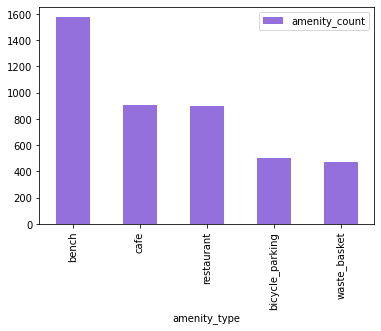

In [186]:
osm_poi_count[:5].plot(kind='bar', x='amenity_type', y='amenity_count', color = 'mediumpurple')

You can see all the fancy colour names for matplotlib here: https://matplotlib.org/stable/gallery/color/named_colors.html

As we have geo data of points of interest represented as a pair of latitude and longitude, we can easily plot the POI locations.

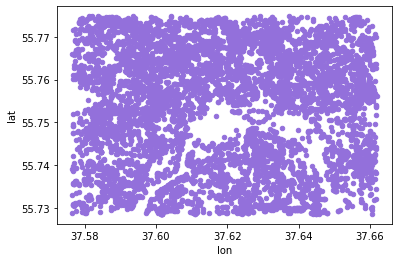

In [187]:
osm_poi.plot(kind='scatter', x='lon', y='lat', color = 'mediumpurple')

Wow, that is not even a GeoDataFrame, but we made a super simple map. 

If you know Moscow, you can even see the outlines of Moscow river in there!

## Woah, great job, everyone! Next: GeoPandas.

### Exersices for later - with the same file (osm_poi dataframe)

1. Print rows 5-110 of DataFrame

2. How many POIs in the dataset work 24/7?

3. What are the categories of POIs that work 24/7? Make a histogram for those.

4. How many POIs have specified working time? How many don't? 

5. How can we print just the column containing street names?

6. How can we get a list of street names in the DataFrame, without duplicates?

7. Do any restaurants work 24/7?

8. How can we select rows where each column has a value? (no null values in any row)

   You may need to check out Google / Stackoverflow for this.

9. How can we create a new DataFrame containing only libraries records? Print 5 first rows of this new DataFrame. Make a map (plot lattitude and longitude)

10. Make a map ( via plot() ) of only cafes.

11. How can we print the DataFrame, sorted by amenity and level columns?

# Good job! All done!